In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

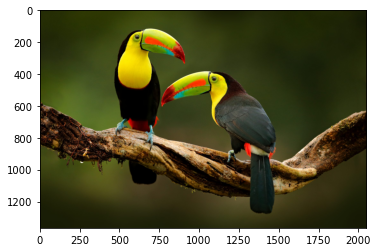

array([[[35, 43,  6],
        [35, 43,  6],
        [35, 43,  6],
        ...,
        [23, 28,  5],
        [25, 30,  7],
        [26, 31,  8]],

       [[36, 44,  7],
        [36, 44,  7],
        [36, 44,  7],
        ...,
        [23, 28,  5],
        [25, 30,  7],
        [26, 31,  8]],

       [[36, 44,  7],
        [37, 45,  8],
        [37, 45,  8],
        ...,
        [23, 28,  5],
        [24, 29,  6],
        [25, 30,  7]],

       ...,

       [[23, 28,  5],
        [23, 28,  5],
        [23, 28,  5],
        ...,
        [23, 28,  6],
        [23, 28,  6],
        [23, 28,  6]],

       [[23, 28,  5],
        [23, 28,  5],
        [23, 28,  5],
        ...,
        [23, 28,  6],
        [23, 28,  6],
        [23, 28,  6]],

       [[23, 28,  5],
        [23, 28,  5],
        [23, 28,  5],
        ...,
        [23, 28,  6],
        [23, 28,  6],
        [23, 28,  6]]], dtype=uint8)

In [3]:
filename = "toucans.jpg"
read_file(filename)

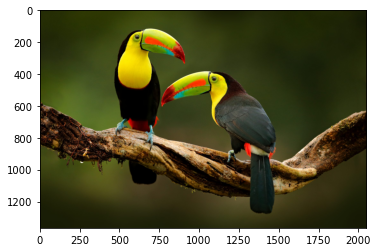

In [4]:
filename = "toucans.jpg"
img = read_file(filename)
org_img = img

In [5]:
def edge_mask(img, line_size, blur):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur)
    
    return edges

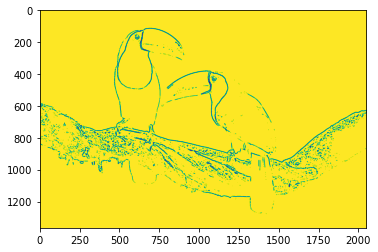

In [6]:
line_size, blur_value = 7,7 
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges)
plt.show()

In [7]:
line_size, blur_value = 7,7 
edge_mask(img, line_size, blur_value)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

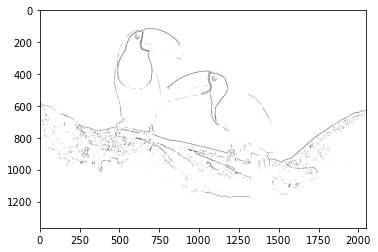

In [8]:
line_size, blur_value = 5,7 
edges = edge_mask(img, line_size, blur_value)

plt.imshow(edges , cmap = "gray")
plt.show()

In [9]:
def color_quantisation(img, k):
    #transform the image
    data = np.float32(img).reshape((-1,3))
    #Determine the criteria
    criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    #Implementing K-means Clustering 
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    
    return result


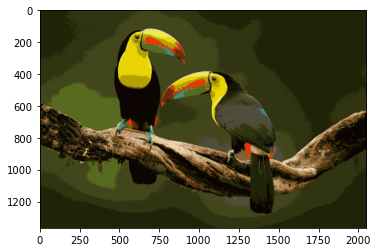

In [10]:
totalColors = 16
line_wdt = 9
blur_value = 7

img = color_quantisation(img, totalColors)

plt.imshow(img)
plt.show()

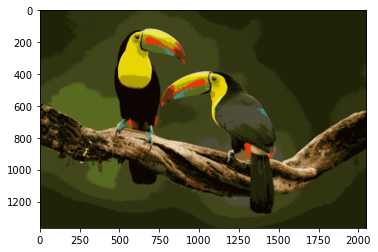

In [11]:
blurred = cv2.bilateralFilter(img, d=line_wdt, sigmaColor = 200, sigmaSpace = 200)

plt.imshow(blurred)
plt.show()

In [12]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask = edges)
    plt.imshow(c)
    plt.title("Reanimated_Image")
    plt.show()

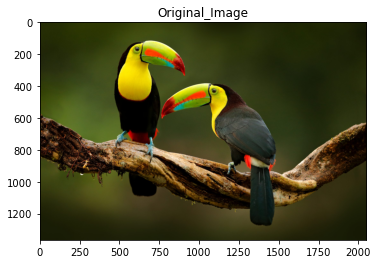

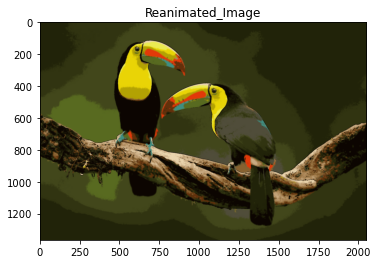

In [13]:
plt.imshow(org_img)
plt.title("Original_Image")
plt.show()
cartoon()